# Exploring the Titanic dataset with tables

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/450px-RMS_Titanic_3.jpg"/>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Set defaults for the seaborn library

In [2]:
sns.set(style="white", font="DejaVu Sans Mono")

Load the Titanic dataset

In [3]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [4]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Set better names for some variables

In [5]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

In [6]:
titanic["class"] = titanic.pclass.map({1: "First", 2: "Second", 3: "Third"})
titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis=1)
titanic["adult_male"] = titanic.who == "man"
titanic["deck"] = titanic.cabin.str[0].map(lambda s: np.nan if s == "T" else s)
titanic["embark_town"] = titanic.embarked.map({"C": "Cherbourg",
                                               "Q": "Queenstown",
                                               "S": "Southampton"})
titanic["alive"] = titanic.survived.map({0: "no", 1: "yes"})
titanic = titanic.drop(["name", "ticket", "cabin"], axis=1)

In [7]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
dtype: int64

Create a palette for the plots

In [8]:
pal = dict(man="#4682B4", woman="pink", child="#2E8B57",
           male="#6495ED", female="pink")

## Who were the Titanic passengers?

Get the number of males and females ignoring age

In [32]:
passenger_sex = titanic.groupby('sex').size().to_frame('number').reset_index()
passenger_sex['percent'] = passenger_sex.number * 100/passenger_sex.number.sum()
passenger_sex.style.format({'percent': '{:.2f}'})

,sex,number,percent
0,female,314,35.24
1,male,577,64.76


Look at how this is distributed across three classes

In [33]:
passenger_class = titanic.groupby('class').size().to_frame('number').reset_index()
passenger_class['percent'] = passenger_class.number * 100/passenger_class.number.sum()
passenger_class.style.format({'percent': '{:.2f}'})

,class,number,percent
0,First,216,24.24
1,Second,184,20.65
2,Third,491,55.11


Separate the classification by children as the **women and chidren first** policy was followed during evacuation

In [35]:
passenger_who = titanic.groupby('who').size().to_frame('number').reset_index()
passenger_who['percent'] = passenger_who.number * 100/passenger_who.number.sum()
passenger_who.style.format({'percent': '{:.2f}'})

,who,number,percent
0,child,83,9.32
1,man,537,60.27
2,woman,271,30.42


Class and sex played an important role in evacuation

In [36]:
passenger_who_class = titanic.groupby(['who', 'class']).size().to_frame('number').reset_index()
passenger_who_class['percent'] = passenger_who_class.number * 100/passenger_who_class.number.sum()
passenger_who_class.style.format({'percent': '{:.2f}'})

,who,class,number,percent
0,child,First,6,0.67
1,child,Second,19,2.13
2,child,Third,58,6.51
3,man,First,119,13.36
4,man,Second,99,11.11
5,man,Third,319,35.80
6,woman,First,91,10.21
7,woman,Second,66,7.41
8,woman,Third,114,12.79


Look at the distribution of ages across the groups

In [41]:
passenger_sex_age = titanic[['sex', 'age']].groupby('sex').mean()
passenger_sex_age.rename(
    columns={'age': 'average_age'}
).style.format({
    'average_age': '{:.1f}'
})  

,average_age
sex,
female,27.9
male,30.7


Separate out children from adults

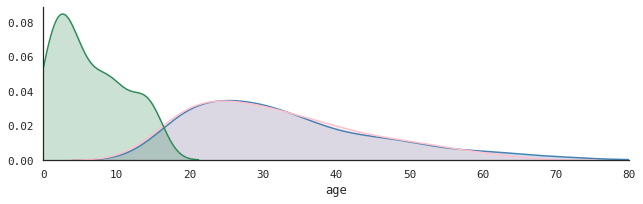

In [14]:
fg = sns.FacetGrid(titanic, hue="who", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

### How may first, second, and third class passengers are in our sample?

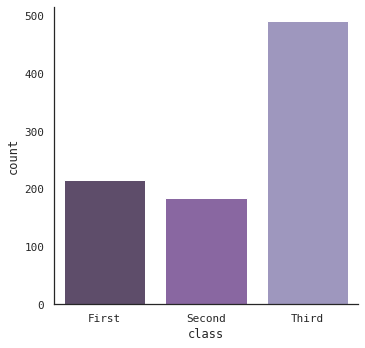

In [15]:
sns.catplot(x="class", data=titanic, kind='count', 
            order=["First", "Second", "Third"], palette="BuPu_d");

Distribution of passengers by class and age

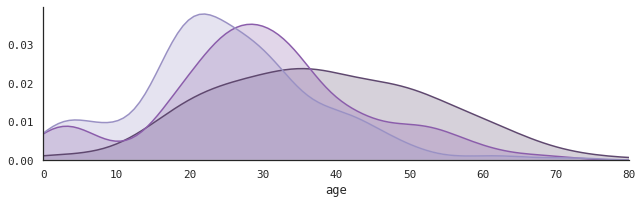

In [16]:
fg = sns.FacetGrid(titanic, hue="class",
                   hue_order=["First", "Second", "Third"], aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

Look at the breakdown by age and sex

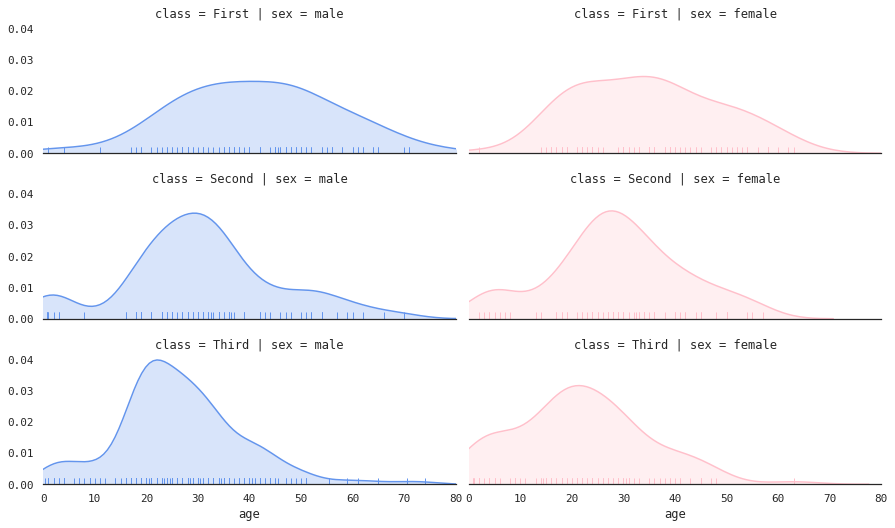

In [17]:
fg = sns.FacetGrid(titanic, col="sex",
                   row="class", row_order=["First", "Second", "Third"],
                   hue="sex", height=2.5, aspect=2.5, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.map(sns.rugplot, "age")
sns.despine(left=True)
fg.set(xlim=(0, 80));

### Where did the passengers come from?

The Titanic passengers embarked at one of three ports before the voyage.

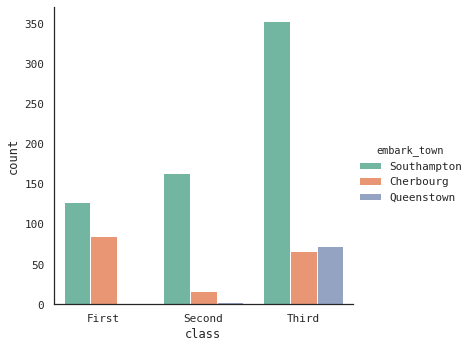

In [18]:
sns.catplot(x="class", order=["First", "Second" , "Third"], 
            data=titanic, hue="embark_town", kind='count', palette="Set2");

##  What made people survive the sinking?

<img src="http://upload.wikimedia.org/wikipedia/en/b/bb/Titanic_breaks_in_half.jpg"/>

First a count of how many of our passengers perished in the sinking

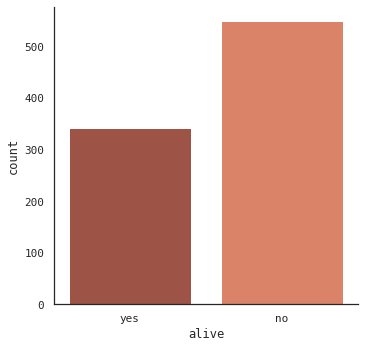

In [19]:
sns.catplot(x="alive", order=["yes", "no"], data=titanic, kind='count', palette="OrRd_d");

Probability of survival by class

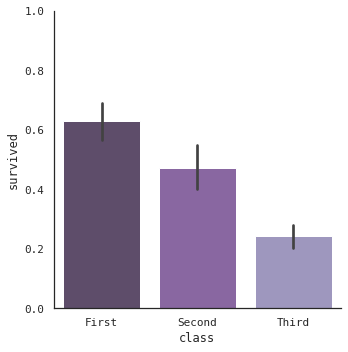

In [20]:
sns.catplot(x="class", order=["First", "Second", "Third"], 
            y="survived", kind="bar", data=titanic, palette="BuPu_d").set(ylim=(0, 1))

Probability of survival by class and sex

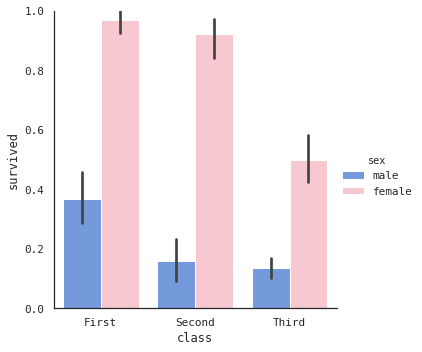

In [21]:
sns.catplot(x="class", order=["First", "Second", "Third"], 
            y="survived", kind="bar", data=titanic, hue="sex", palette=pal).set(ylim=(0, 1));

The evacuation proceeded with women and children first

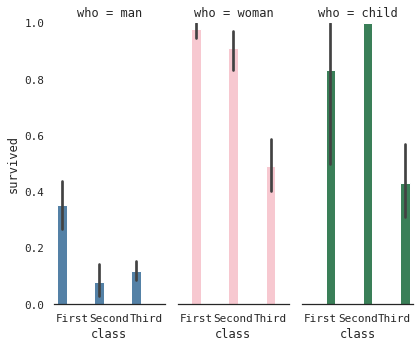

In [22]:
fg = sns.catplot(x="class", order=["First", "Second" , "Third"],
                 y="survived", data=titanic,
                 kind="bar", hue="who", col="who", palette=pal, aspect=.4)
fg.set(ylim=(0, 1))
fg.despine(left=True);

The probability of survival by age

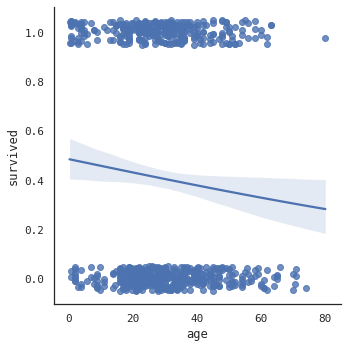

In [23]:
sns.lmplot("age", "survived", titanic, logistic=True, y_jitter=.05);

The probability of survival by age and sex

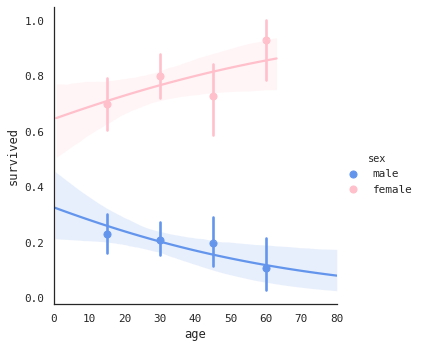

In [28]:
age_bins = [15, 30, 45, 60]
sns.lmplot("age", "survived", titanic, hue="sex",
           palette=pal, x_bins=age_bins, logistic=True).set(xlim=(0, 80));

Survival by class on one plot

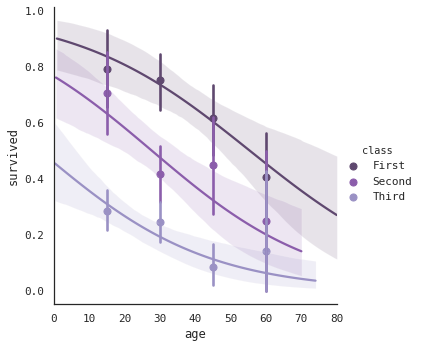

In [30]:
sns.lmplot(x="age", y="survived", data=titanic,
           hue="class", hue_order=["First", "Second", "Third"],
           palette="BuPu_d", x_bins=age_bins, logistic=True).set(xlim=(0, 80));

Survival by class on three plots

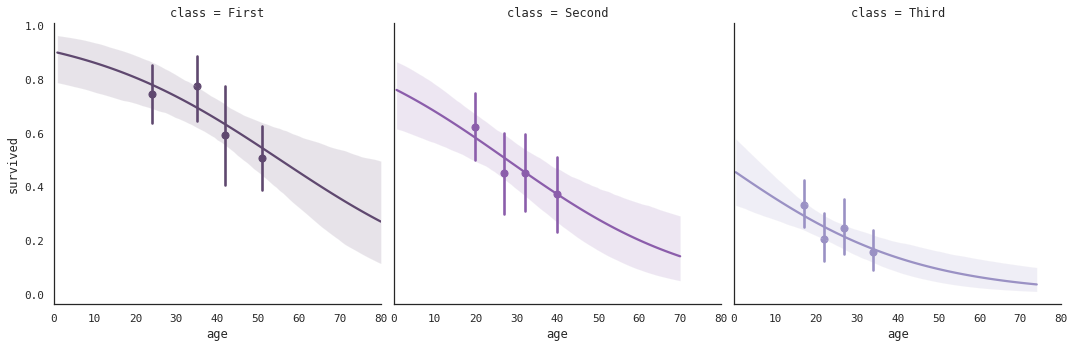

In [34]:
sns.lmplot(x="age", y="survived", data=titanic,
           col="class", col_order=["First", "Second", "Third"],
           hue="class", hue_order=["First", "Second", "Third"],
           palette="BuPu_d", x_bins=4, logistic=True).set(xlim=(0, 80));